<a href="https://colab.research.google.com/github/realtechsupport/cocktail/blob/main/sandbox/notebooks/tf_record_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing the images and labels stored in tf record to feed into NN

# Task 1: Sanity Check
1. Visualize the images and labels stored in the tf record

# Task 2: Normalize the input image band-wise
1. The input images need to be normalized bandwise
(This step could be done in the creation of tf record step itself but, we want to use this function in the prediction phase as well. Hence we are doing it as part of pre-processing)

# Task 3: Create patches

1. create patches using tensorflow's native functions
2. save them as tf. records

# Task 4: Implement sampling criterion

1. Check if you could implement a sampling criterion using tf native functions, other wise use the old way

2. Save the sampled images and labels as tf.records

# Task 5: Create train, test and validation splits

1. Here create splits based on the tf native methodologies

# Task 6: perform one hot encoding on labels

1. Make sure the one-hot encoding is done right. Use tf native methods.



In [37]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [38]:
import tensorflow as tf


Task 1: Sanity Check
Visualize the images and labels stored in the tf record



In [39]:
feature_description = {
    "image": tf.io.VarLenFeature(tf.float32),
    "image_shape": tf.io.VarLenFeature(tf.int64),
    "label": tf.io.VarLenFeature(tf.float32),
    "label_shape": tf.io.VarLenFeature(tf.int64),
}

In [40]:
def parse(serialized_examples):
    return tf.io.parse_example(serialized_examples, feature_description)

dataset = tf.data.TFRecordDataset(["/content/gdrive/MyDrive/exp/output.tfrecord"]).map(parse)
for parsed_examples in dataset:
    print(parsed_examples)  # two examples at a time

{'image': SparseTensor(indices=tf.Tensor(
[[        0]
 [        1]
 [        2]
 ...
 [135436813]
 [135436814]
 [135436815]], shape=(135436816, 1), dtype=int64), values=tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(135436816,), dtype=float32), dense_shape=tf.Tensor([135436816], shape=(1,), dtype=int64)), 'image_shape': SparseTensor(indices=tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int64), values=tf.Tensor([3694 4583    8], shape=(3,), dtype=int64), dense_shape=tf.Tensor([3], shape=(1,), dtype=int64)), 'label': SparseTensor(indices=tf.Tensor(
[[       0]
 [       1]
 [       2]
 ...
 [16929599]
 [16929600]
 [16929601]], shape=(16929602, 1), dtype=int64), values=tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(16929602,), dtype=float32), dense_shape=tf.Tensor([16929602], shape=(1,), dtype=int64)), 'label_shape': SparseTensor(indices=tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int64), values=tf.Tensor([3694 4583    1], shape=(3,), dtype=int64), dense_shape=tf.Tensor([3], shape=(1,), dtype

In [41]:
for parsed_example in dataset.take(1):
    image_shape = tf.sparse.to_dense(parsed_example["image_shape"])
    image = tf.reshape(tf.sparse.to_dense(parsed_example["image"]), image_shape)
    label_shape = tf.sparse.to_dense(parsed_example["label_shape"])
    label = tf.reshape(tf.sparse.to_dense(parsed_example["label"]), label_shape)


In [42]:
image.shape

TensorShape([3694, 4583, 8])

In [ ]:
type(image)

tensorflow.python.framework.ops.EagerTensor

In [43]:
label.shape

TensorShape([3694, 4583, 1])

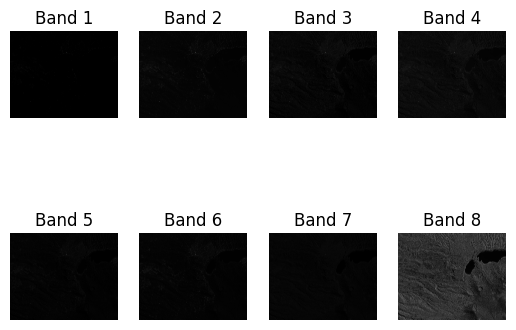

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming your image tensor is named 'image_tensor'
# You might need to reshape it to (height, width, bands) if it's in a different format
# For example, if the bands are the last dimension, you can use tf.transpose to rearrange them
image_tensor = tf.transpose(image, perm=[0, 1, 2])

# Convert the TensorFlow tensor to a NumPy array
image_array = tf.keras.backend.eval(image_tensor)

# Display each band separately
for band in range(image_array.shape[2]):
    plt.subplot(2, 4, band + 1)  # Assuming 8 bands, change the subplot layout accordingly
    plt.imshow(image_array[:, :, band], cmap='gray')  # You can choose a different colormap if needed
    plt.title(f'Band {band + 1}')
    plt.axis('off')

plt.show()

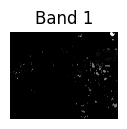

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming your image tensor is named 'image_tensor'
# You might need to reshape it to (height, width, bands) if it's in a different format
# For example, if the bands are the last dimension, you can use tf.transpose to rearrange them
image_tensor = tf.transpose(label, perm=[0, 1, 2])

# Convert the TensorFlow tensor to a NumPy array
image_array = tf.keras.backend.eval(image_tensor)

# Display each band separately
for band in range(image_array.shape[2]):
    plt.subplot(2, 4, band + 1)  # Assuming 8 bands, change the subplot layout accordingly
    plt.imshow(image_array[:, :, band], cmap='gray')  # You can choose a different colormap if needed
    plt.title(f'Band {band + 1}')
    plt.axis('off')

plt.show()

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 78.5 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [ ]:
tiff_path = '/content/gdrive/MyDrive/exp/other images/test_folder/area2_0619_2023_8bands_composite.tif'

In [ ]:
# Open the TIFF file
with rasterio.open(tiff_path) as src:
    # Read the image data
    img = src.read()

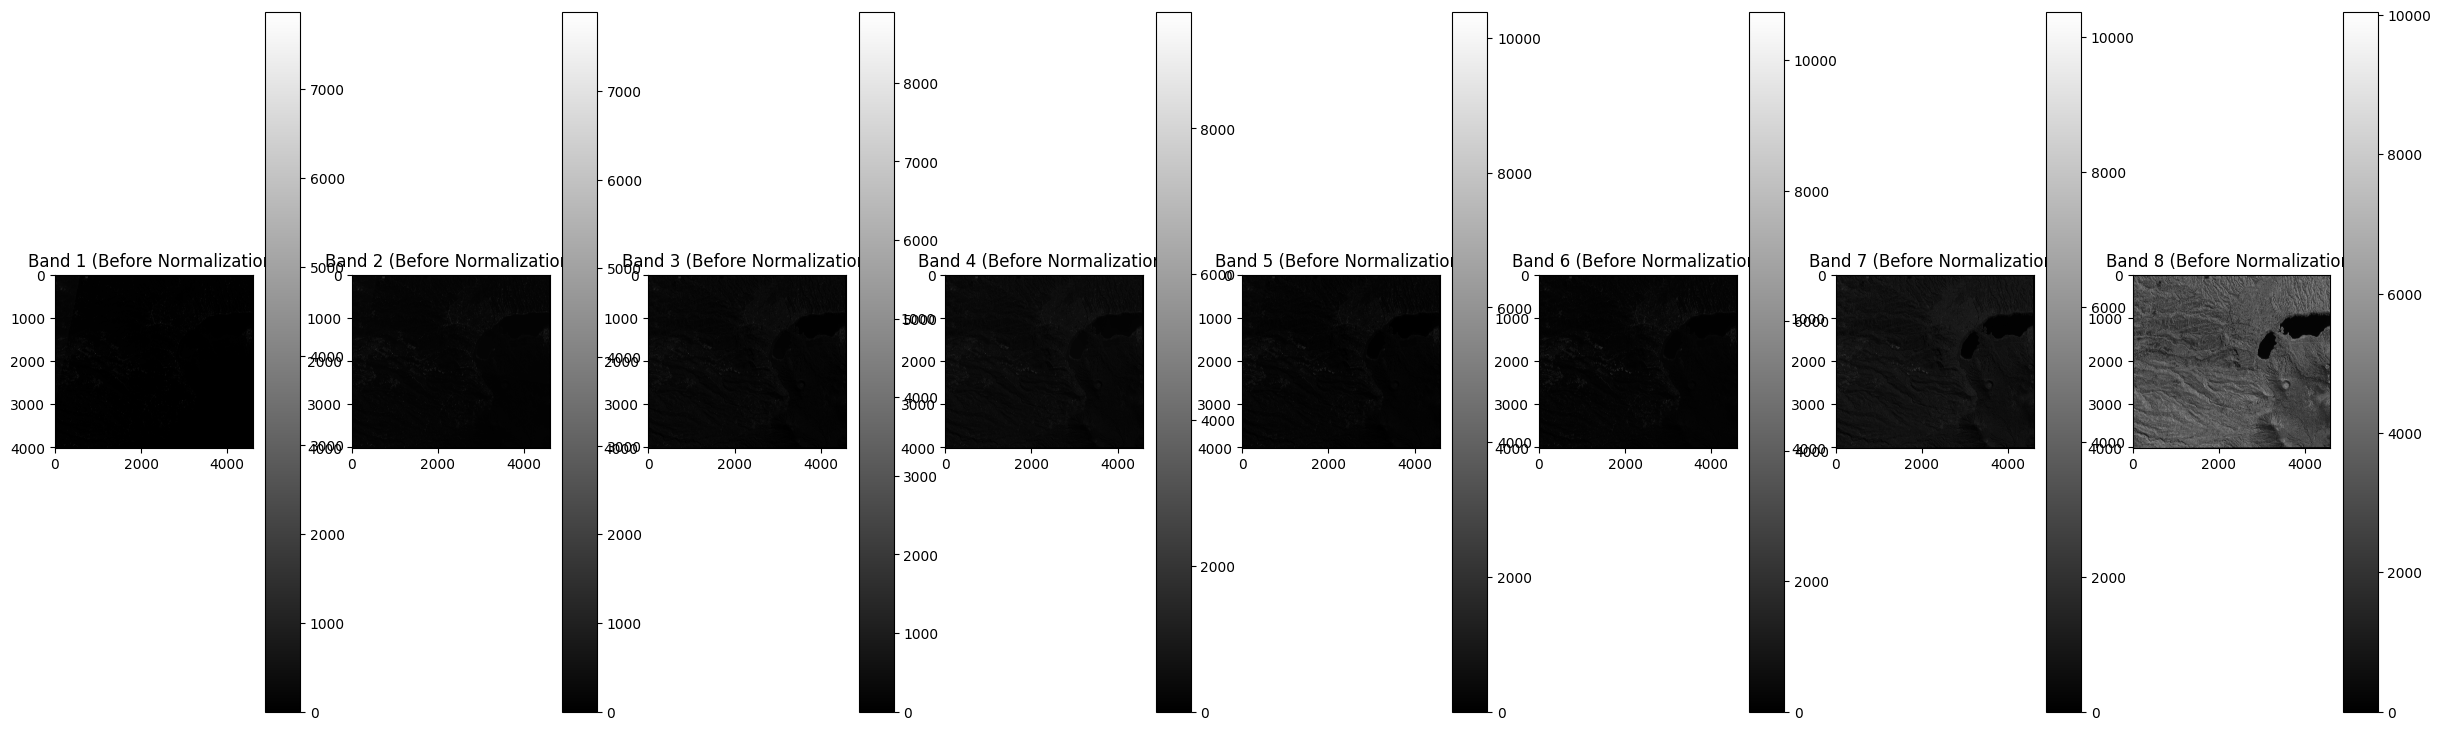

In [ ]:
# Visualize the bands before normalization
plt.figure(figsize=(30,20))
for i, band in enumerate(img, start=1):
    plt.subplot(2, img.shape[0], i)
    plt.imshow(band, cmap='gray')
    plt.colorbar()
    plt.title(f'Band {i} (Before Normalization)')


Task 2: Normalization

In [ ]:
image.shape

TensorShape([3694, 4583, 8])

In [ ]:
 tf.reduce_max(image)

<tf.Tensor: shape=(), dtype=float32, numpy=31133.723>

In [ ]:
tf.reduce_max(normalized_image)

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [ ]:


def print_max_min_along_channels(input_tensor):
    # Calculate the minimum and maximum values along the channel axis
    min_vals = tf.math.reduce_min(input_tensor, axis=(0, 1))
    max_vals = tf.math.reduce_max(input_tensor, axis=(0, 1))

    # Print the results for each channel
    for channel, (min_val, max_val) in enumerate(zip(min_vals, max_vals)):
        print(f"Channel {channel + 1}: Min = {min_val.numpy()}, Max = {max_val.numpy()}")

# Example usage:
# Assuming you have a tensor named 'your_input_tensor'
print_max_min_along_channels(image)


Channel 1: Min = 0.0, Max = 11538.009765625
Channel 2: Min = 0.0, Max = 6580.70263671875
Channel 3: Min = 0.0, Max = 7336.12890625
Channel 4: Min = 0.0, Max = 7969.30126953125
Channel 5: Min = 0.0, Max = 12767.986328125
Channel 6: Min = 0.0, Max = 11290.568359375
Channel 7: Min = 0.0, Max = 31133.72265625
Channel 8: Min = 0.0, Max = 16012.0234375


In [ ]:

def bandwise_normalize(input_tensor, epsilon=1e-8):
    # Calculate the minimum and maximum values along the channel axis
    min_val = tf.math.reduce_min(input_tensor, axis=2, keepdims=True)
    max_val = tf.math.reduce_max(input_tensor, axis=2, keepdims=True)

    # Check for potential numerical instability
    denom = max_val - min_val
    denom = tf.where(tf.abs(denom) < epsilon, epsilon, denom)

    # Normalize the tensor band-wise to the range [0, 1]
    normalized_tensor = (input_tensor - min_val) / denom

    return normalized_tensor

In [ ]:
tf.reduce_max(new_normalized_tensor)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
new_normalized_tensor = bandwise_normalize(image)

In [ ]:
def is_normalized(tensor):
    min_val = tf.reduce_min(tensor)
    max_val = tf.reduce_max(tensor)

    return min_val >= 0 and max_val <= 1


# Check if the tensor is normalized
if is_normalized(new_normalized_tensor):
    print("The tensor is properly normalized.")
else:
    print("The tensor is not normalized within the expected range.")

The tensor is properly normalized.


In [ ]:
print_max_min_along_channels(new_normalized_tensor)

Channel 1: Min = 0.0, Max = 0.9427772164344788
Channel 2: Min = 0.0, Max = 1.0
Channel 3: Min = 0.0, Max = 1.0
Channel 4: Min = 0.0, Max = 1.0
Channel 5: Min = 0.0, Max = 1.0
Channel 6: Min = 0.0, Max = 1.0
Channel 7: Min = 0.0, Max = 1.0
Channel 8: Min = 0.0, Max = 1.0


Task 3: create patches out of normalized tensor and label tensor


In [44]:
def tile_image(fullimg, CHANNELS=1, TILE_HT=128, TILE_WD=128):
    fullimg = pad_to_multiple(fullimg, TILE_HT, TILE_WD)
    images = tf.expand_dims(fullimg, axis=0)
    tiles = tf.image.extract_patches(
        images=images,
        sizes=[1, TILE_HT, TILE_WD, 1],
        strides=[1, TILE_HT, TILE_WD, 1],
        rates=[1, 1, 1, 1],
        padding='VALID')
    print(tiles.shape)

    tiles = tf.squeeze(tiles, axis=0)
    nrows = tiles.shape[0]
    ncols = tiles.shape[1]
    print(tiles.shape)
    tiles = tf.reshape(tiles, [nrows, ncols, TILE_HT, TILE_WD, CHANNELS])
    print(tiles.shape)
    return tiles

In [ ]:
image.shape

TensorShape([3694, 4583, 8])

In [45]:
def pad_to_multiple(image, TILE_HT, TILE_WD):
    # Get the current dimensions
    height, width, channels = image.shape

    # Calculate the target dimensions
    target_height = tf.cast(tf.math.ceil(height / TILE_HT) * TILE_HT, tf.int32)
    target_width = tf.cast(tf.math.ceil(width / TILE_WD) * TILE_WD, tf.int32)

    # Calculate the amount of padding
    pad_height = target_height - height
    pad_width = target_width - width

    # Pad the image
    padded_image = tf.image.resize_with_crop_or_pad(image, target_height, target_width)

    return padded_image


In [47]:
import matplotlib.pylab as plt
import numpy as np

In [ ]:
tiles = tile_image(label)

(1, 29, 36, 16384)
(29, 36, 16384)
(29, 36, 128, 128, 1)


(1, 28, 35, 16384)
(28, 35, 128, 128, 1)


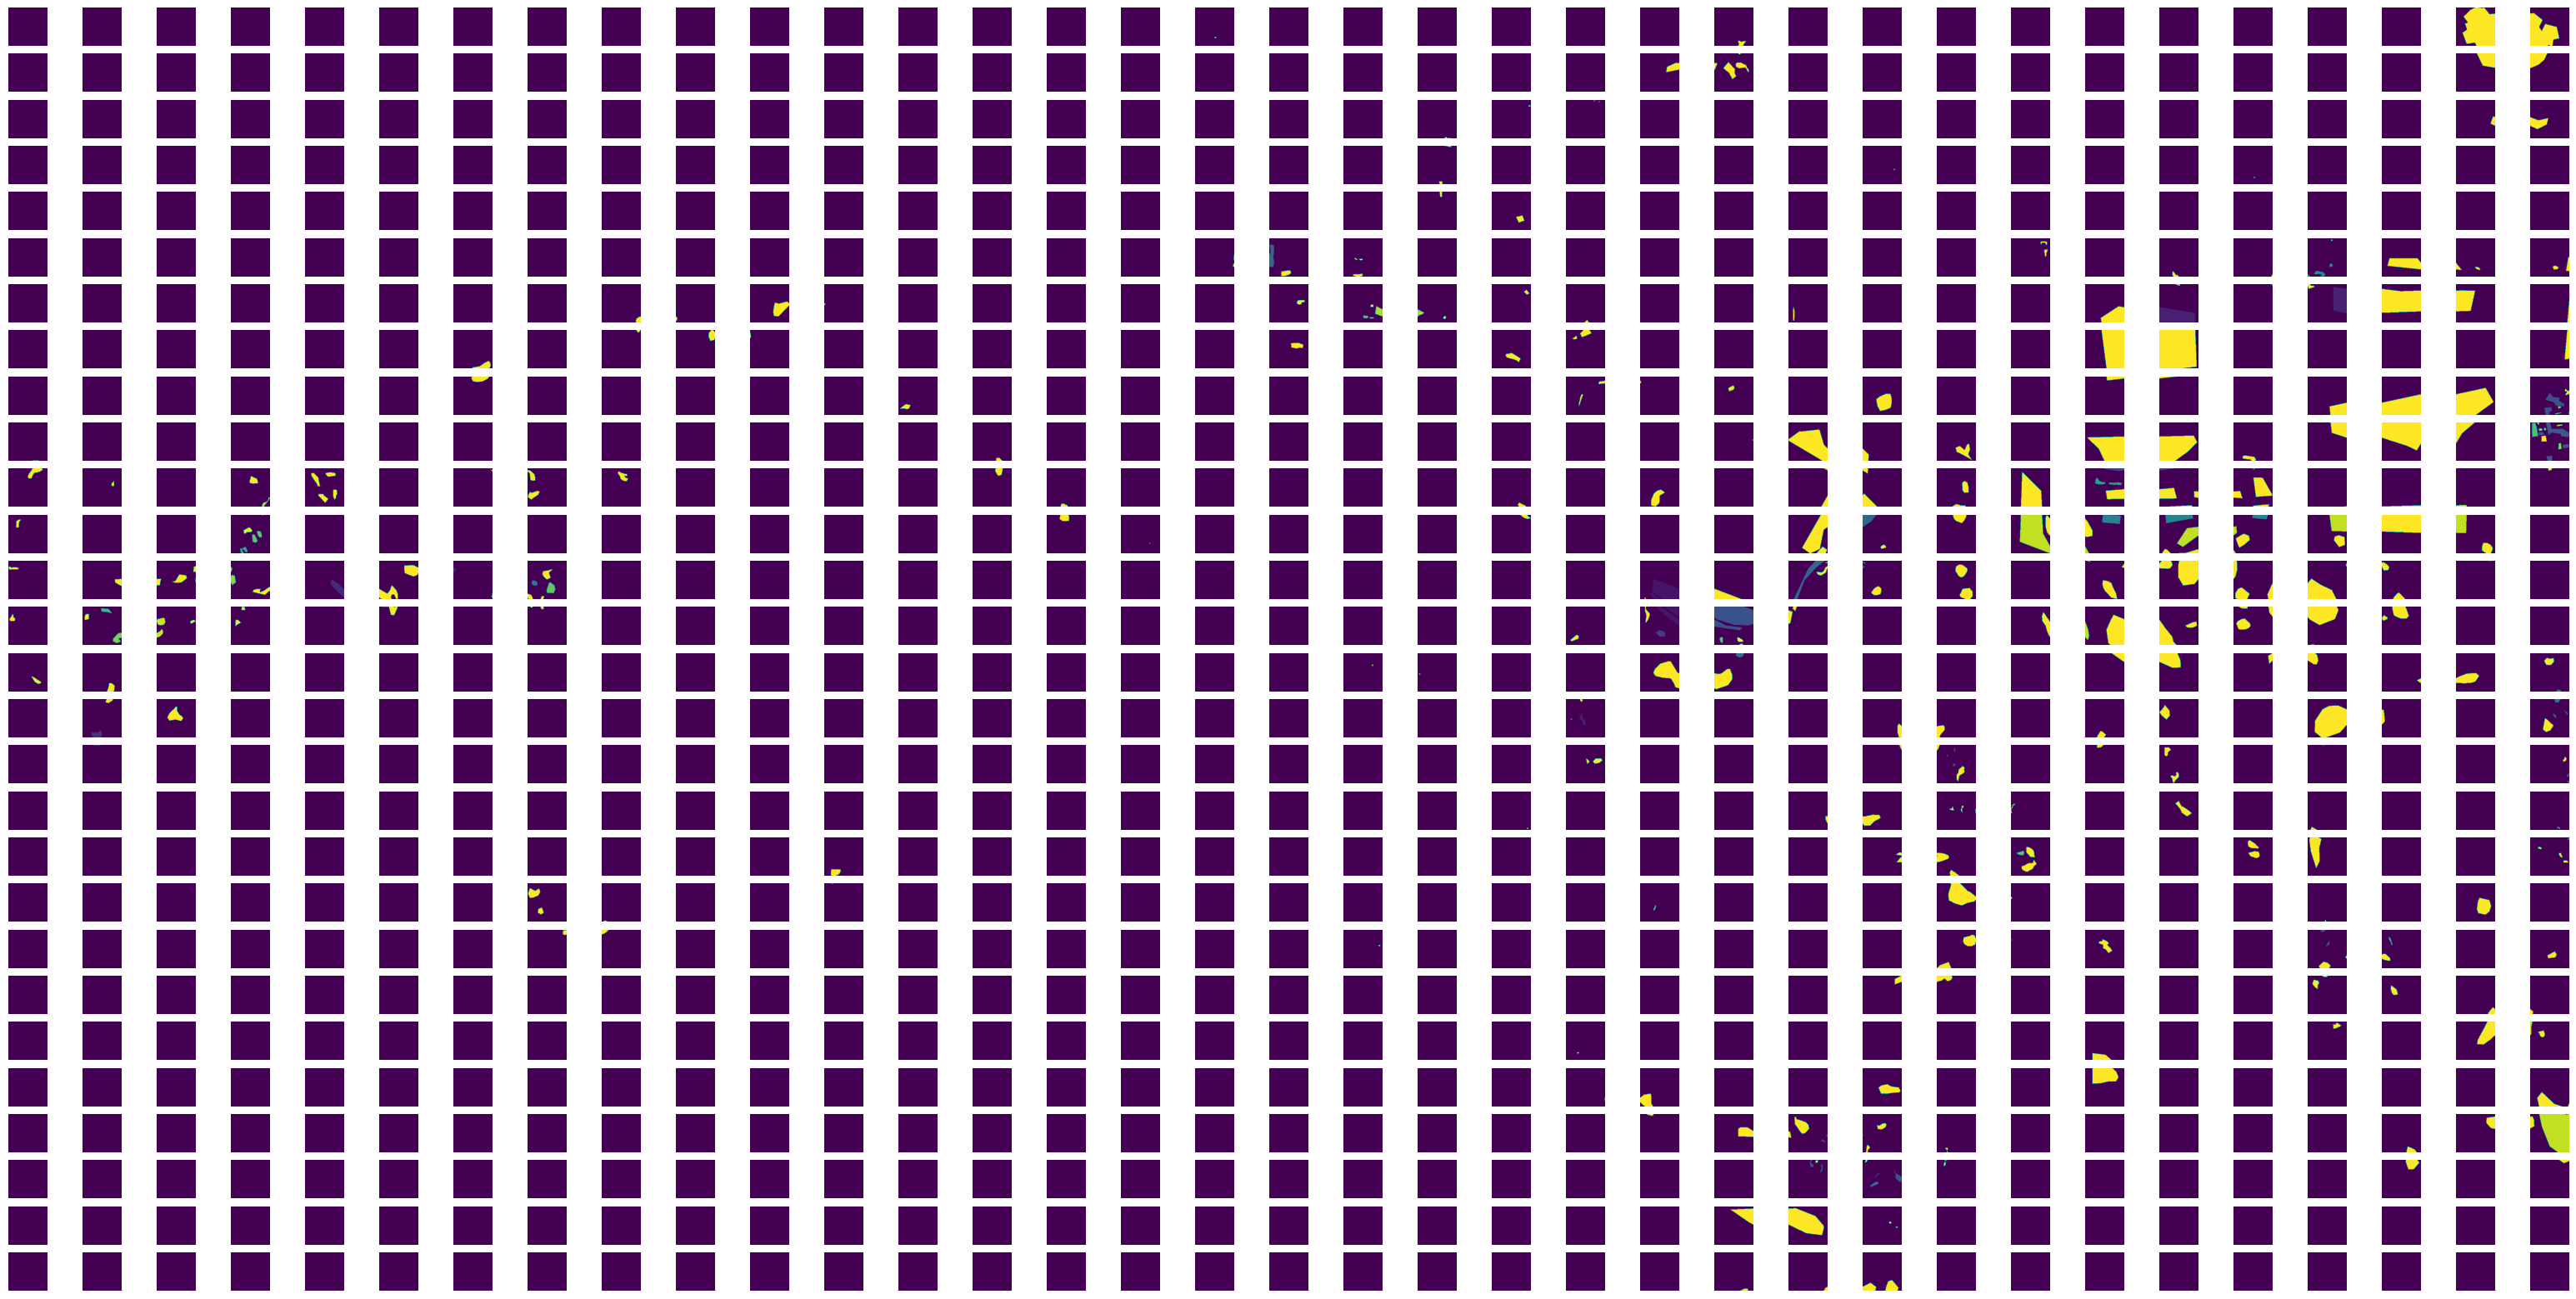

In [ ]:
tiles = tile_image(label)
nrows = tiles.shape[0]
ncols = tiles.shape[1]
f, ax = plt.subplots(nrows, ncols, figsize=(40,20))
for rowno in range(nrows):
    for colno in range(ncols):
        img = tiles[rowno][colno]
        ax[rowno, colno].imshow( tiles[rowno][colno].numpy() );
        ax[rowno, colno].axis('off')

(1, 29, 36, 16384)
(29, 36, 16384)
(29, 36, 128, 128, 1)


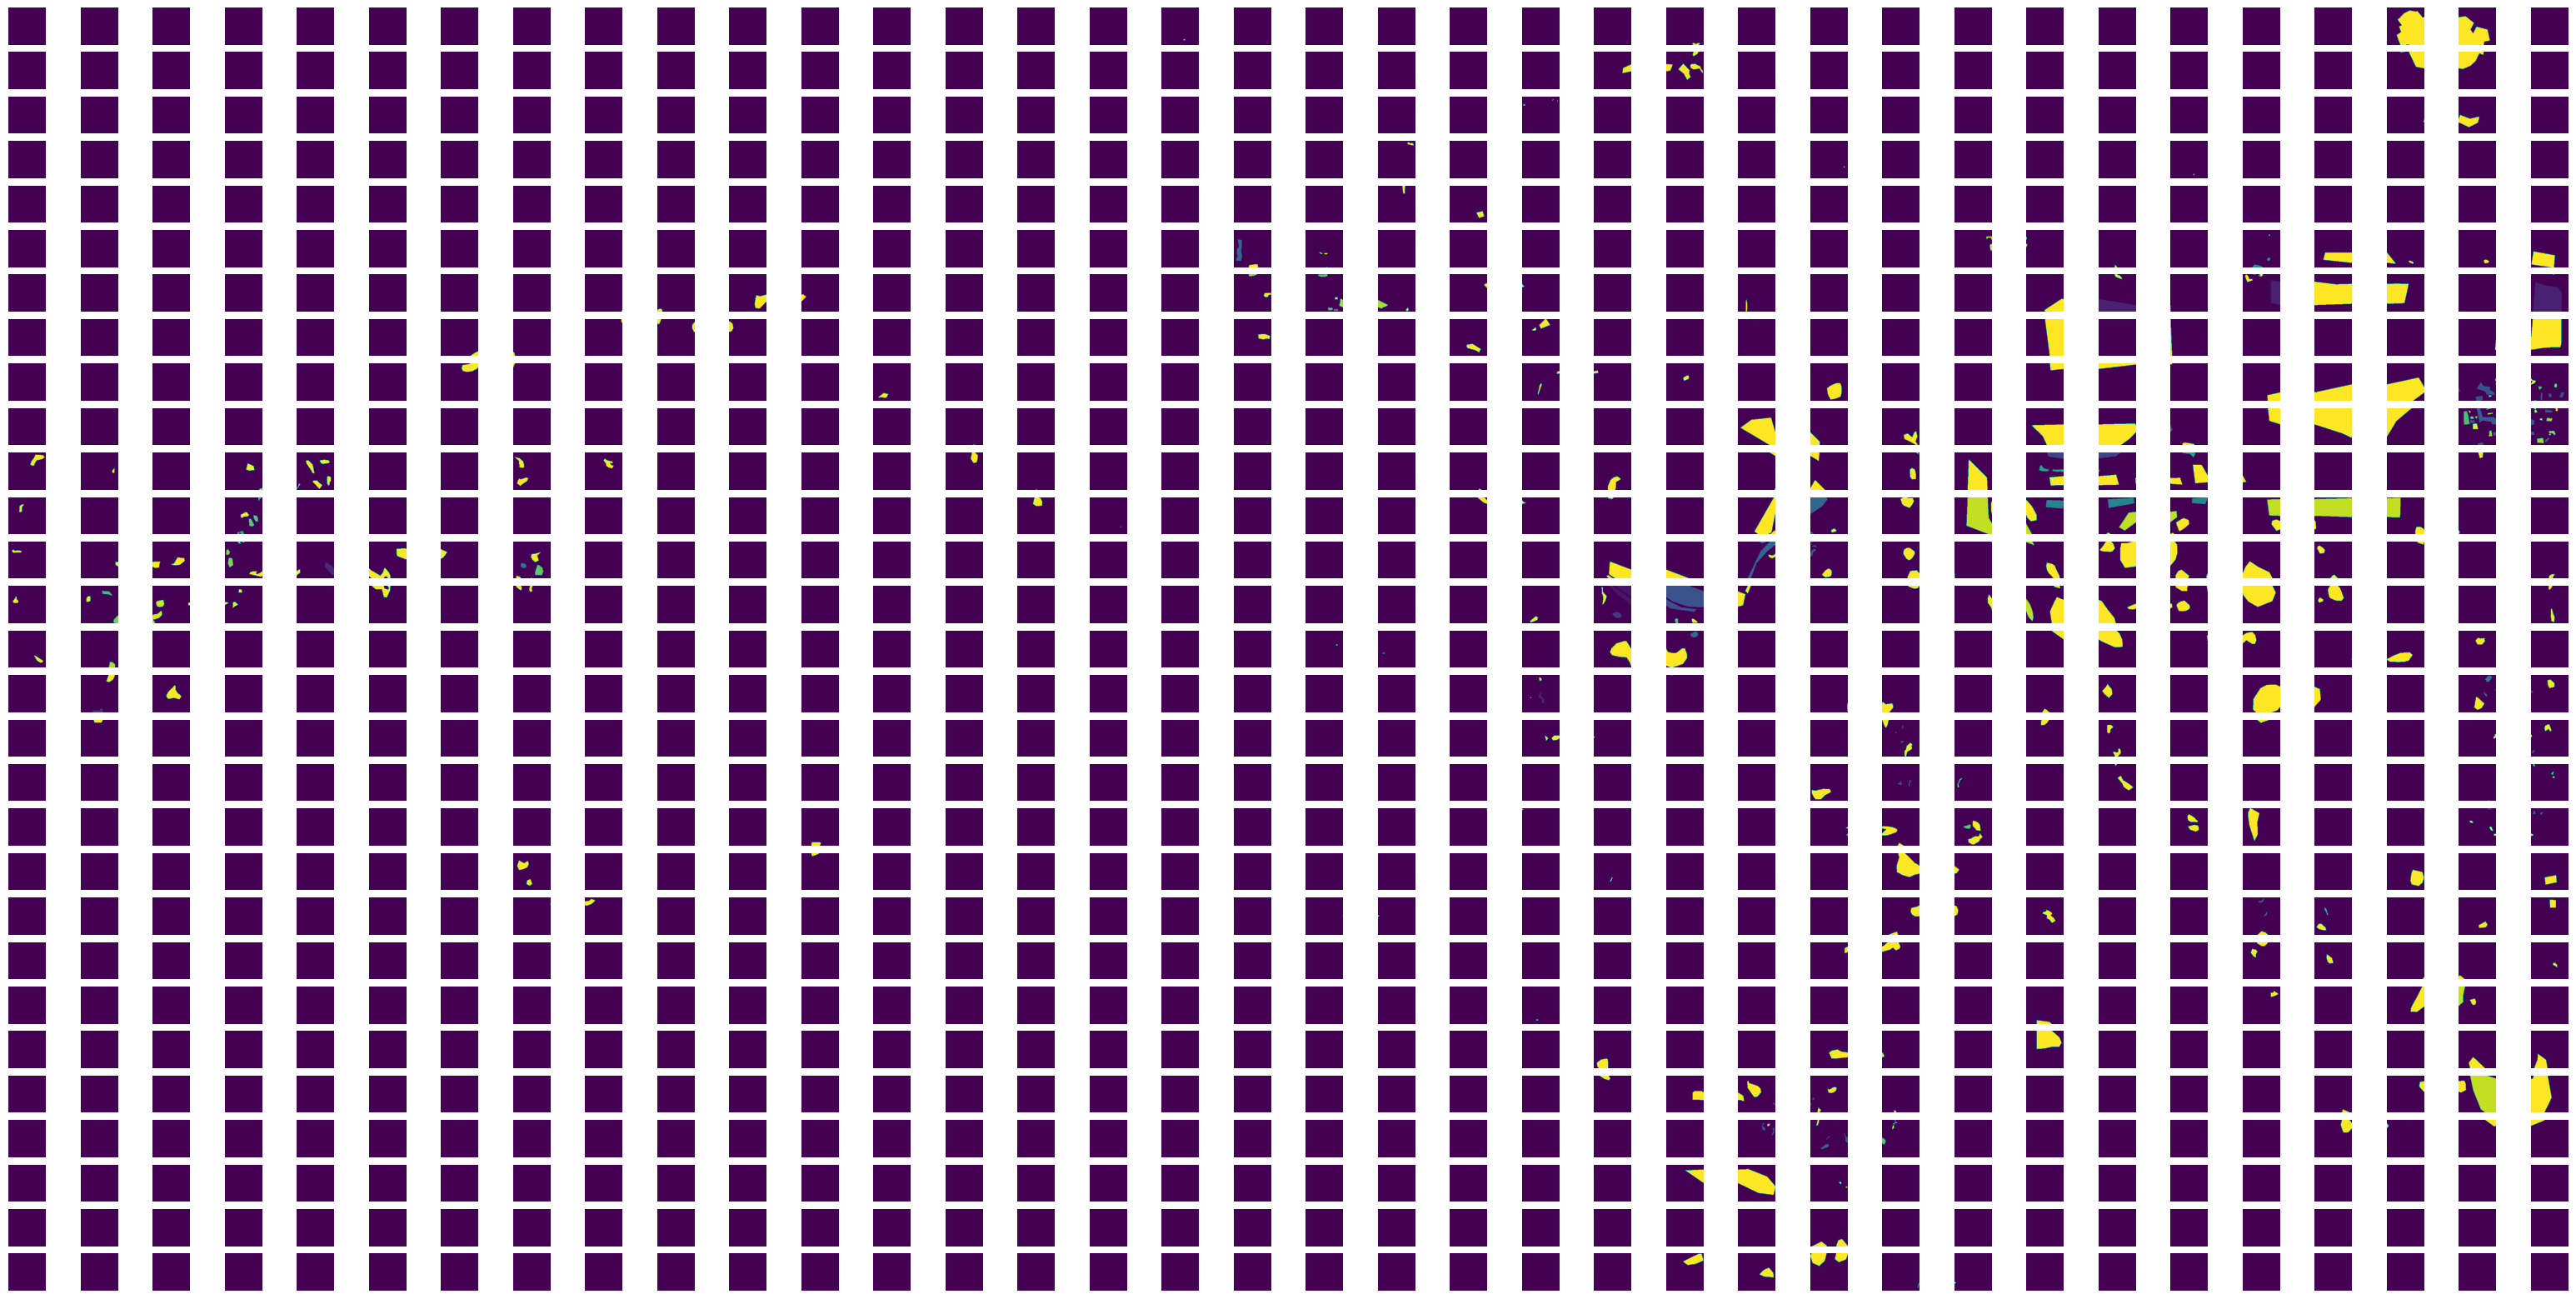

In [ ]:
tiles = tile_image(label)
nrows = tiles.shape[0]
ncols = tiles.shape[1]
f, ax = plt.subplots(nrows, ncols, figsize=(40,20))
for rowno in range(nrows):
    for colno in range(ncols):
        img = tiles[rowno][colno]
        ax[rowno, colno].imshow( tiles[rowno][colno].numpy() );
        ax[rowno, colno].axis('off')

Four tasks left:

1. how to implement sampling
2. save the sampled tensor corresponding patches and display them
3. shuffle and split the samples
4. perform one-hot encoding on labels and verify

(1, 15, 18, 65536)
(15, 18, 65536)
(15, 18, 256, 256, 1)


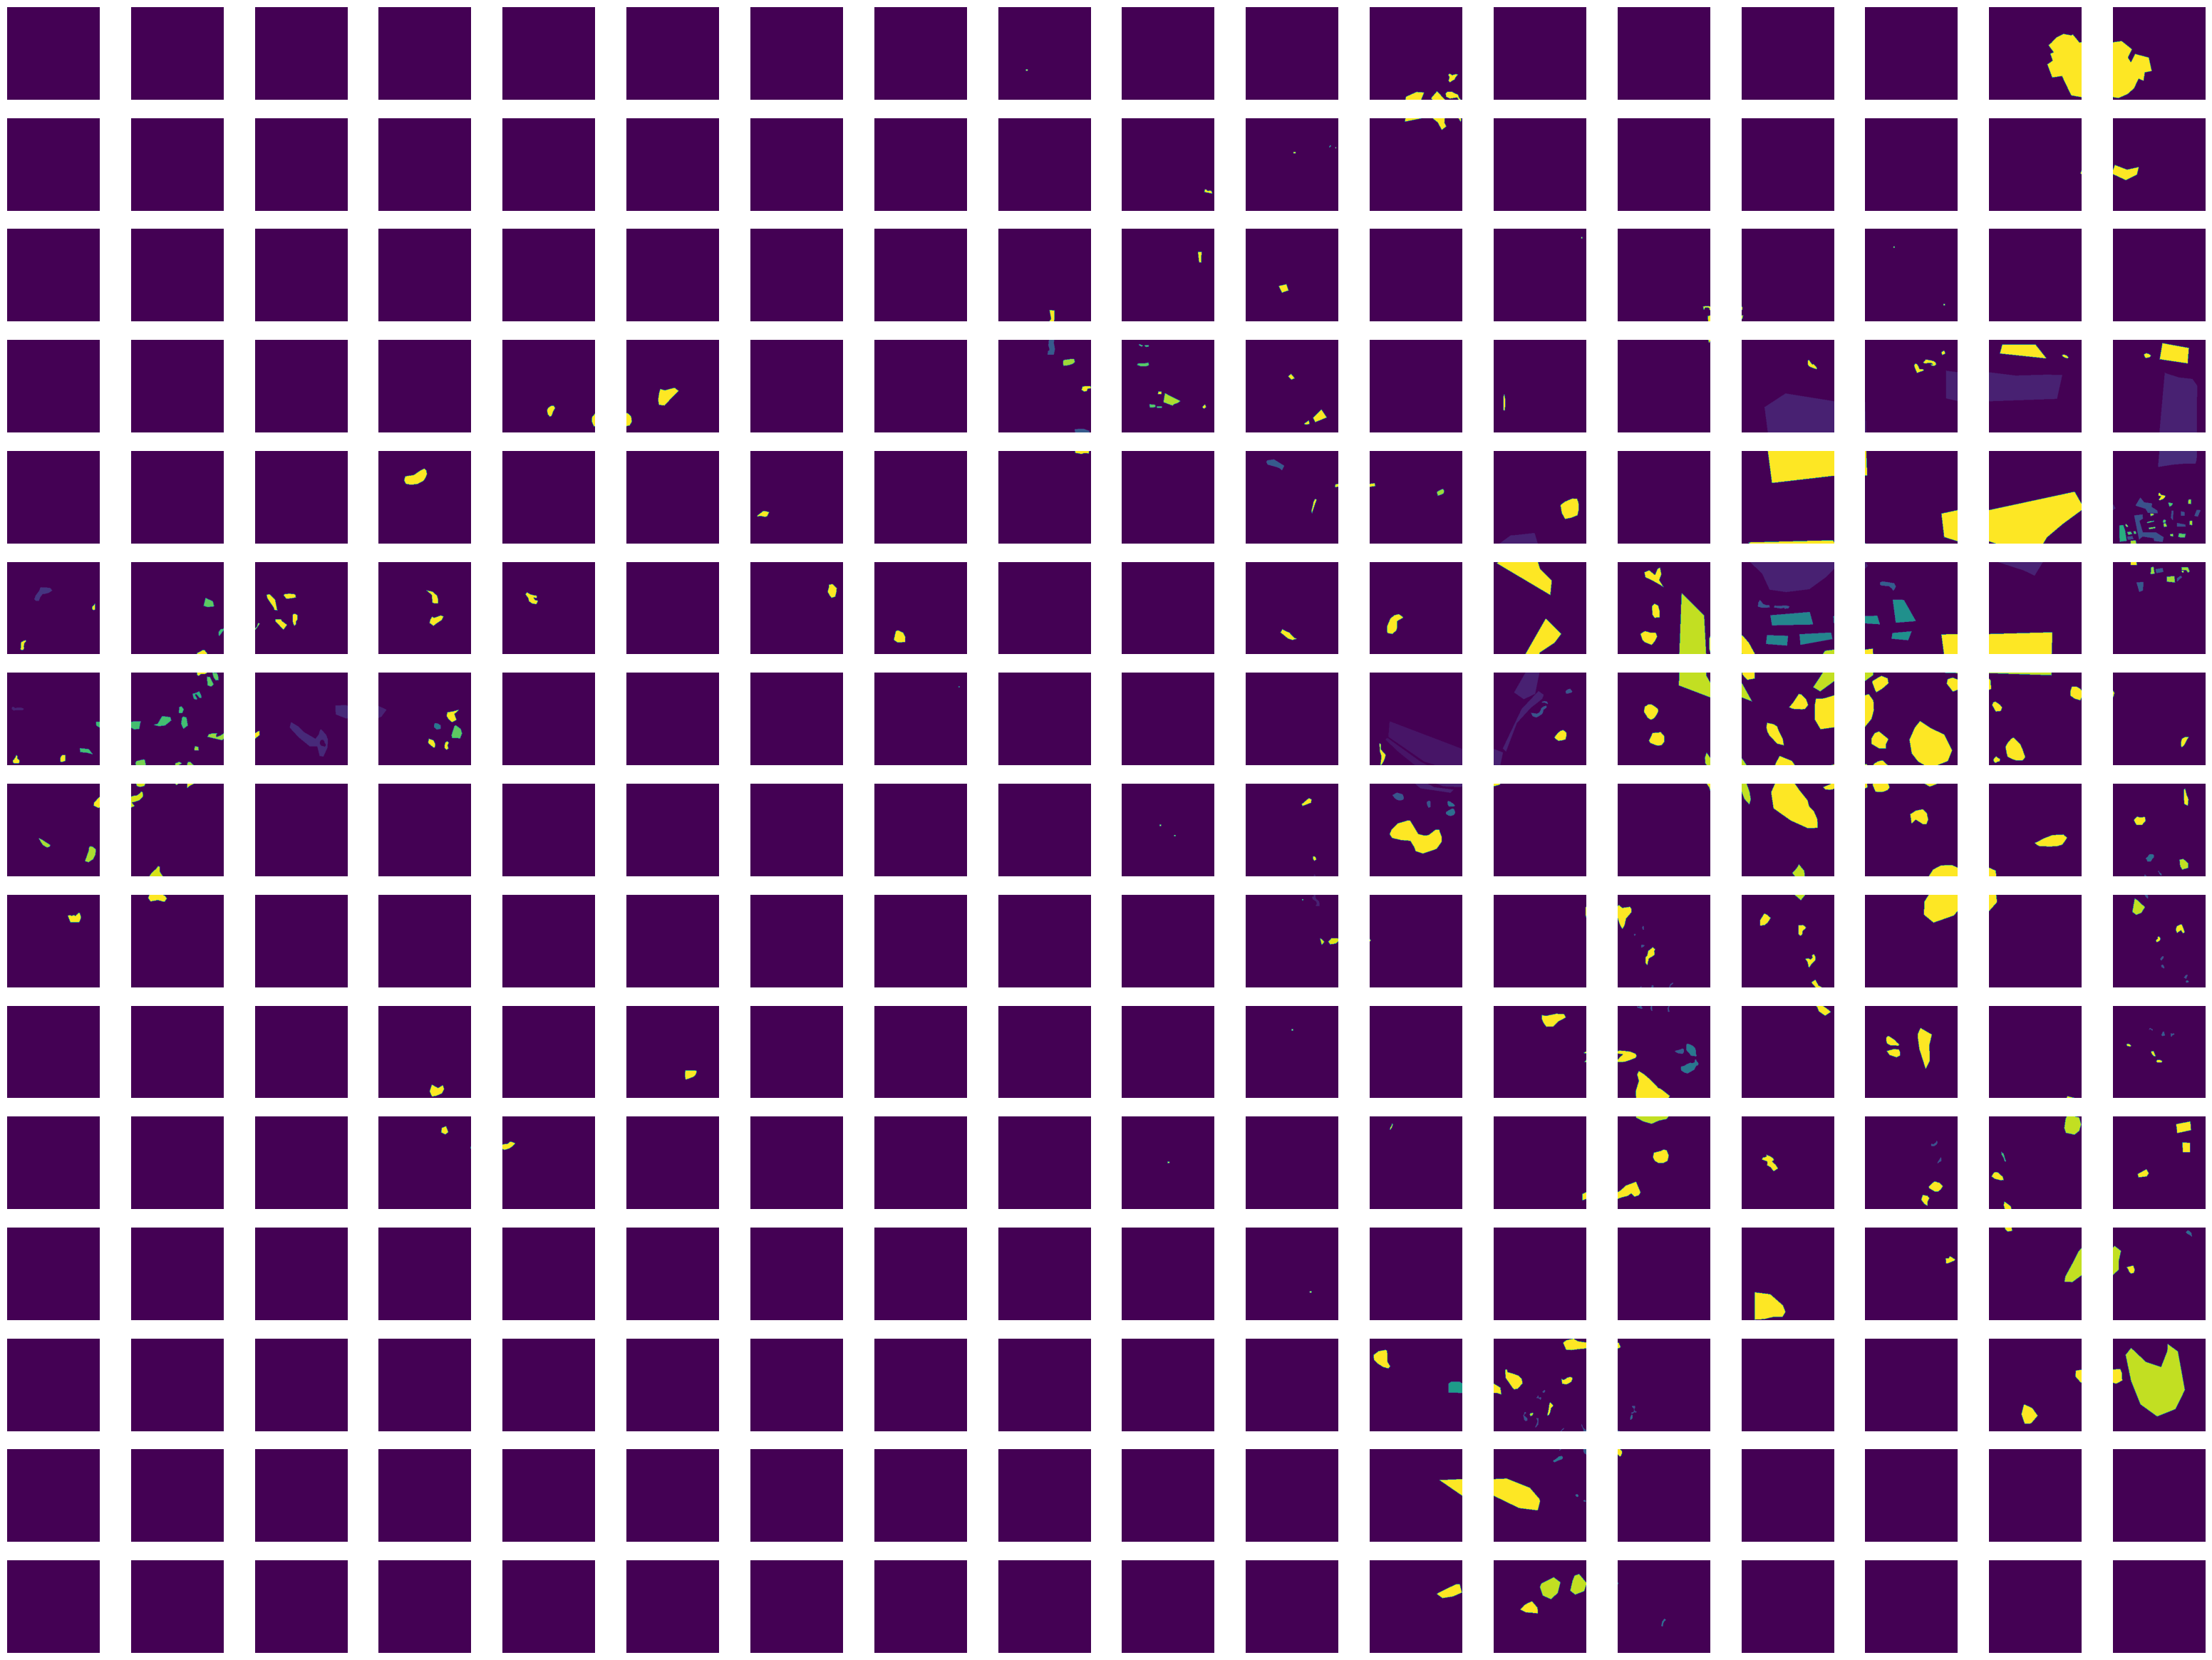

In [49]:
tiles_256 = tile_image(label, CHANNELS = 1, TILE_HT = 256, TILE_WD = 256)
nrows = tiles_256.shape[0]
ncols = tiles_256.shape[1]
f, ax = plt.subplots(nrows, ncols, figsize=(40,30))
for rowno in range(nrows):
    for colno in range(ncols):
        img = tiles_256[rowno][colno]
        ax[rowno, colno].imshow( tiles_256[rowno][colno].numpy() );
        ax[rowno, colno].axis('off')

Task 1:
1.implement sampling

In [50]:


# Assuming your tensor is named 'my_tensor'
# Replace this with the actual name of your tensor
my_tensor = tiles_256  # Your tensor here

# Set the threshold percentage
threshold_percentage = 99.9

# Count the number of zeros in each patch
num_zeros = tf.reduce_sum(tf.cast(tf.equal(my_tensor, 0), tf.float32), axis=[2, 3, 4])

# Calculate the total number of elements in each patch
total_elements = tf.cast(tf.reduce_prod(tf.shape(my_tensor)[2:]), tf.float32)

# Calculate the percentage of zeros in each patch
percentage_zeros = (num_zeros / total_elements) * 100.0

boolean_mask = percentage_zeros <= threshold_percentage
# Apply the threshold logic
sampled_tensor = tf.cast(percentage_zeros >= threshold_percentage, tf.int32)

# Print the resulting tensor
print(boolean_mask)
print(sampled_tensor)


tf.Tensor(
[[False False False False False False False False False False False  True
  False False False False  True  True]
 [False False False False False False False False False  True False  True
  False False False False False  True]
 [False False False False False False False False  True  True  True False
  False  True False False False False]
 [False False False False  True  True False False  True  True  True False
   True False  True  True  True  True]
 [False False False  True False False  True False  True False  True  True
   True False  True  True  True  True]
 [ True  True  True  True  True False  True  True False False  True  True
   True  True  True  True  True  True]
 [ True  True  True  True False False False False False False False  True
   True  True  True  True  True  True]
 [ True  True False False False False False False False False  True  True
   True  True  True  True  True  True]
 [ True  True False False False False False False False False  True False
  False  Tr

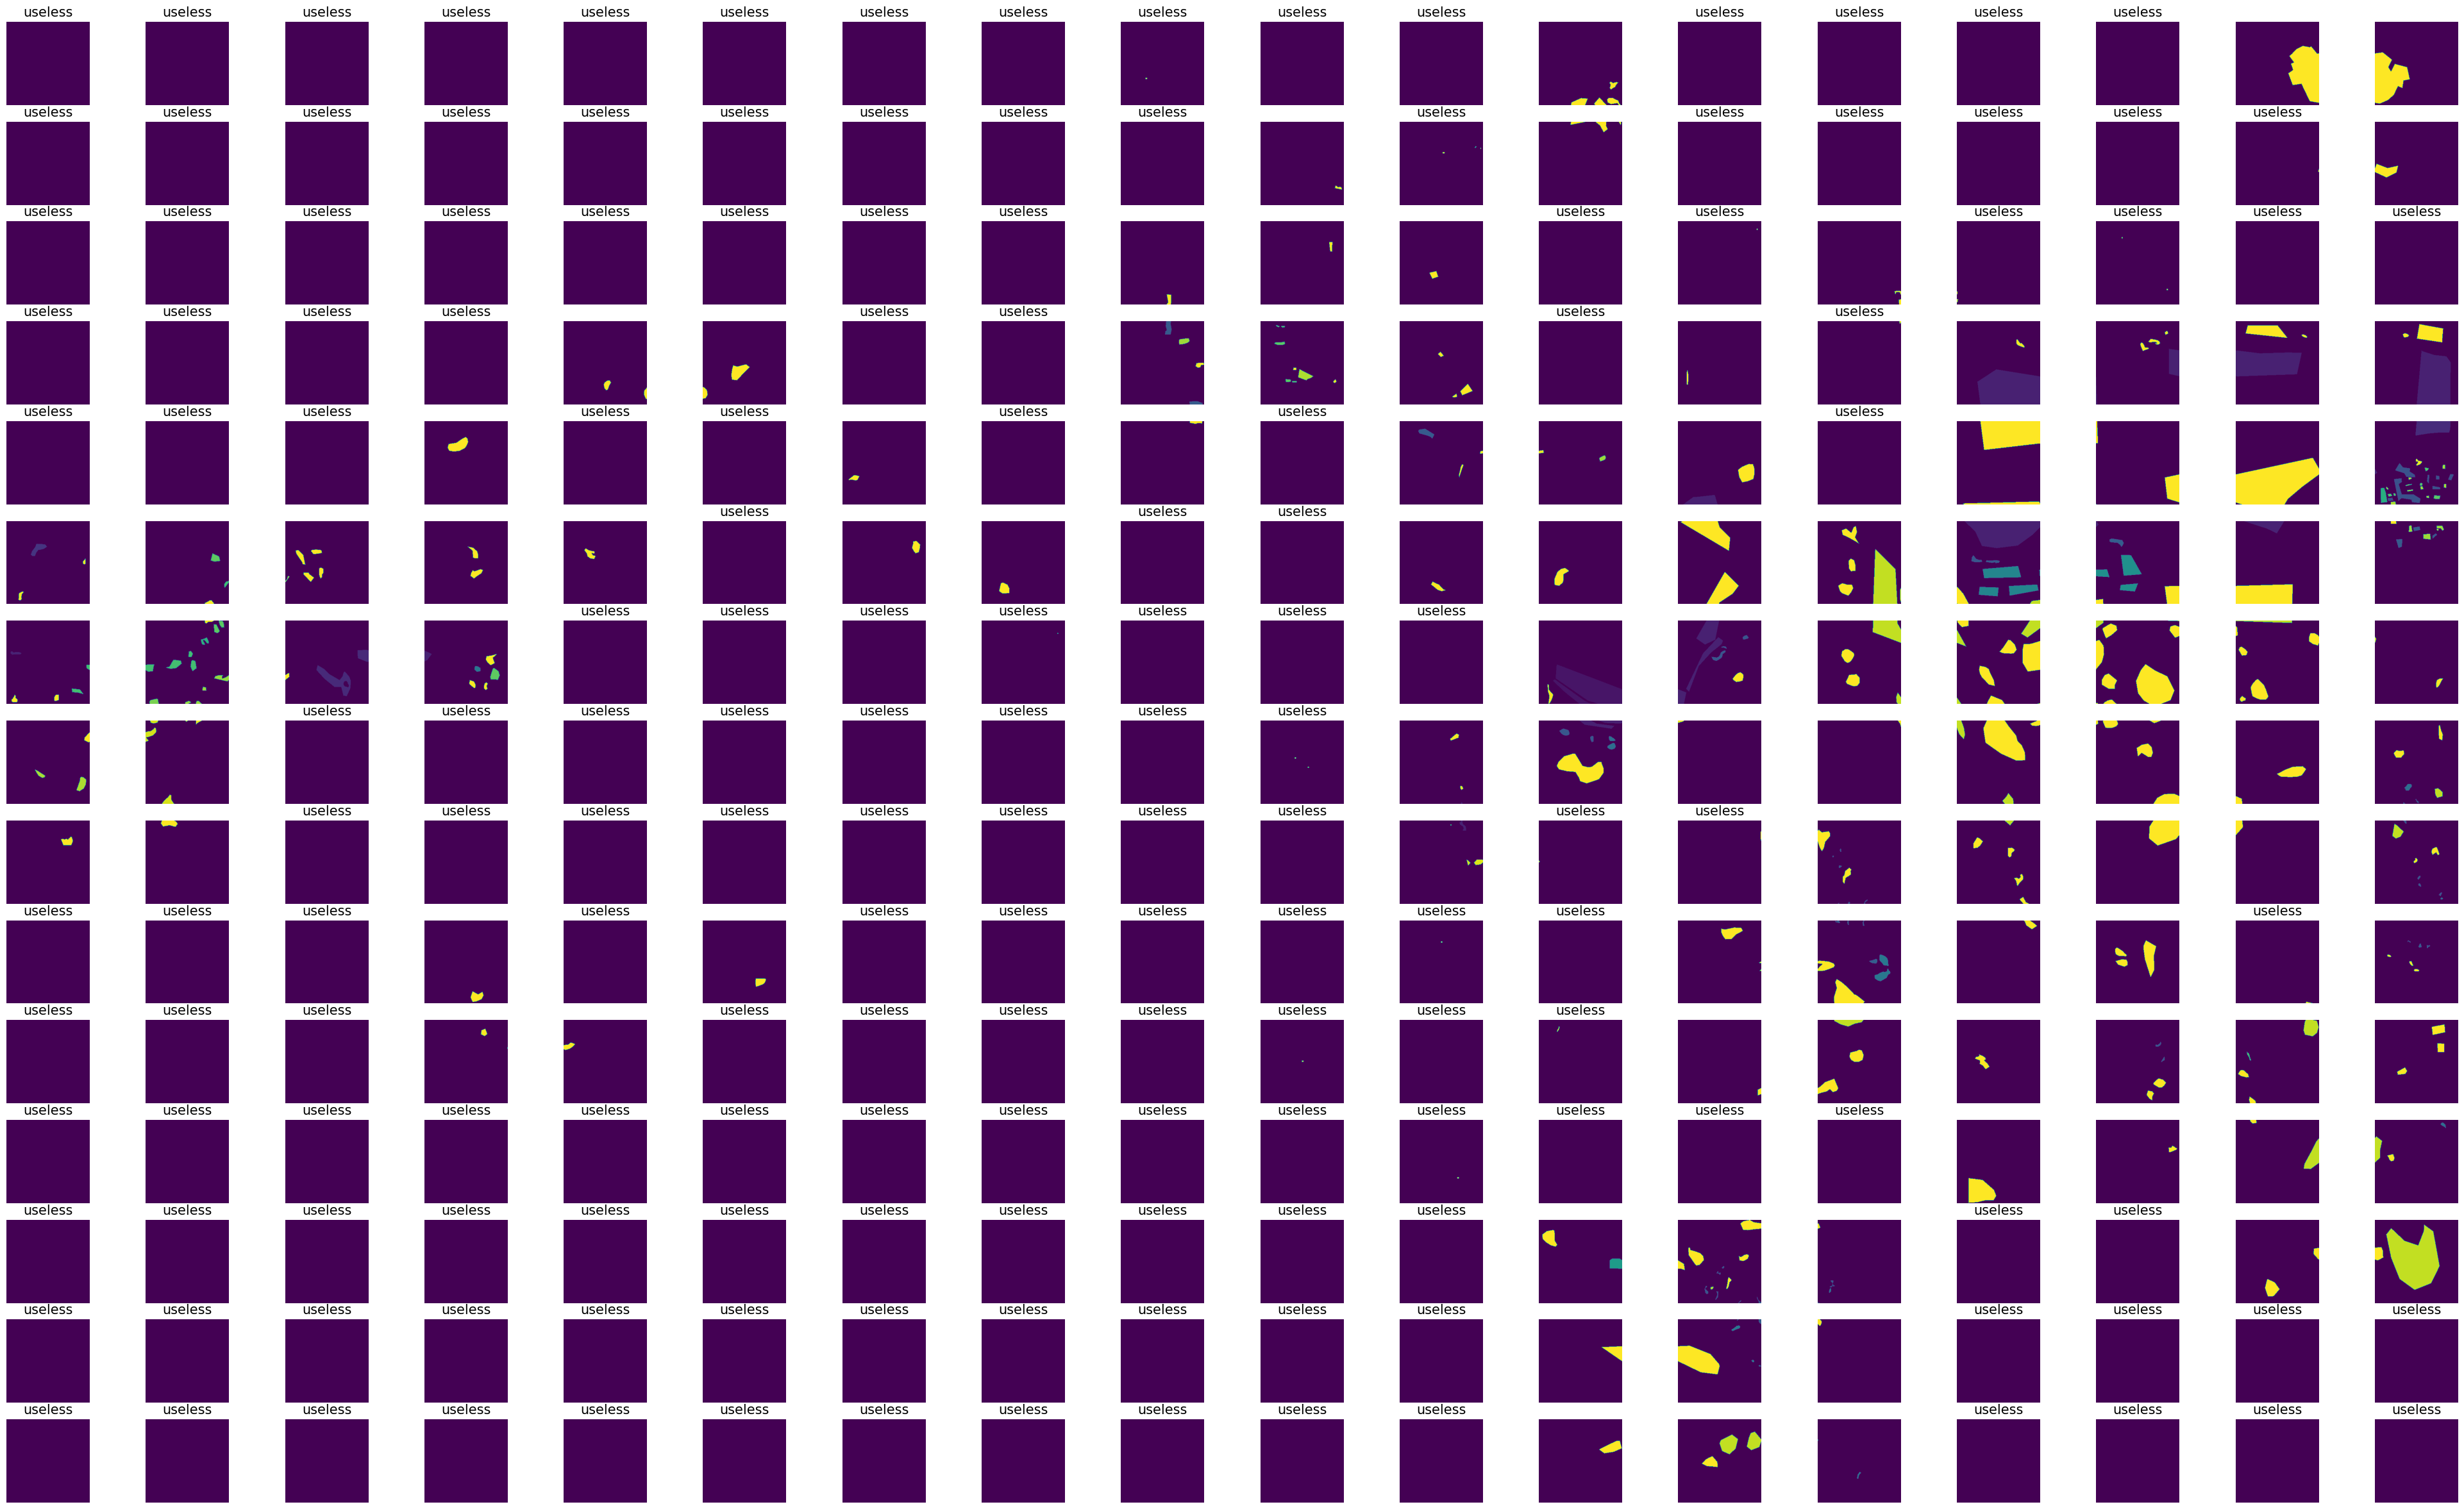

In [51]:
f, ax = plt.subplots(nrows, ncols, figsize=(50,30))
for rowno in range(nrows):
    for colno in range(ncols):
        img = tiles_256[rowno][colno]
        ax[rowno, colno].imshow( tiles_256[rowno][colno].numpy() );
        ax[rowno, colno].axis('off')
        if sampled_tensor[rowno][colno] > 0:
            ax[rowno, colno].set_title('useless', fontsize=15)

In [54]:
tiles_256.shape

TensorShape([15, 18, 256, 256, 1])

In [55]:
boolean_mask.shape

TensorShape([15, 18])

In [56]:
15*18

270

In [57]:
# Convert boolean values to 1s and 0s using tf.cast
tensor_as_int = tf.cast(boolean_mask, tf.int32)

# Count the number of True values
num_true = tf.reduce_sum(tensor_as_int)

# Count the number of False values
num_false = tf.reduce_sum(1 - tensor_as_int)

print("Number of True values:", num_true.numpy())
print("Number of False values:", num_false.numpy())

Number of True values: 104
Number of False values: 166


In [ ]:
boolean_mask

In [52]:
new_sampled_tensor = tf.boolean_mask(tiles_256, boolean_mask)

In [53]:
new_sampled_tensor.shape

TensorShape([104, 256, 256, 1])

In [65]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

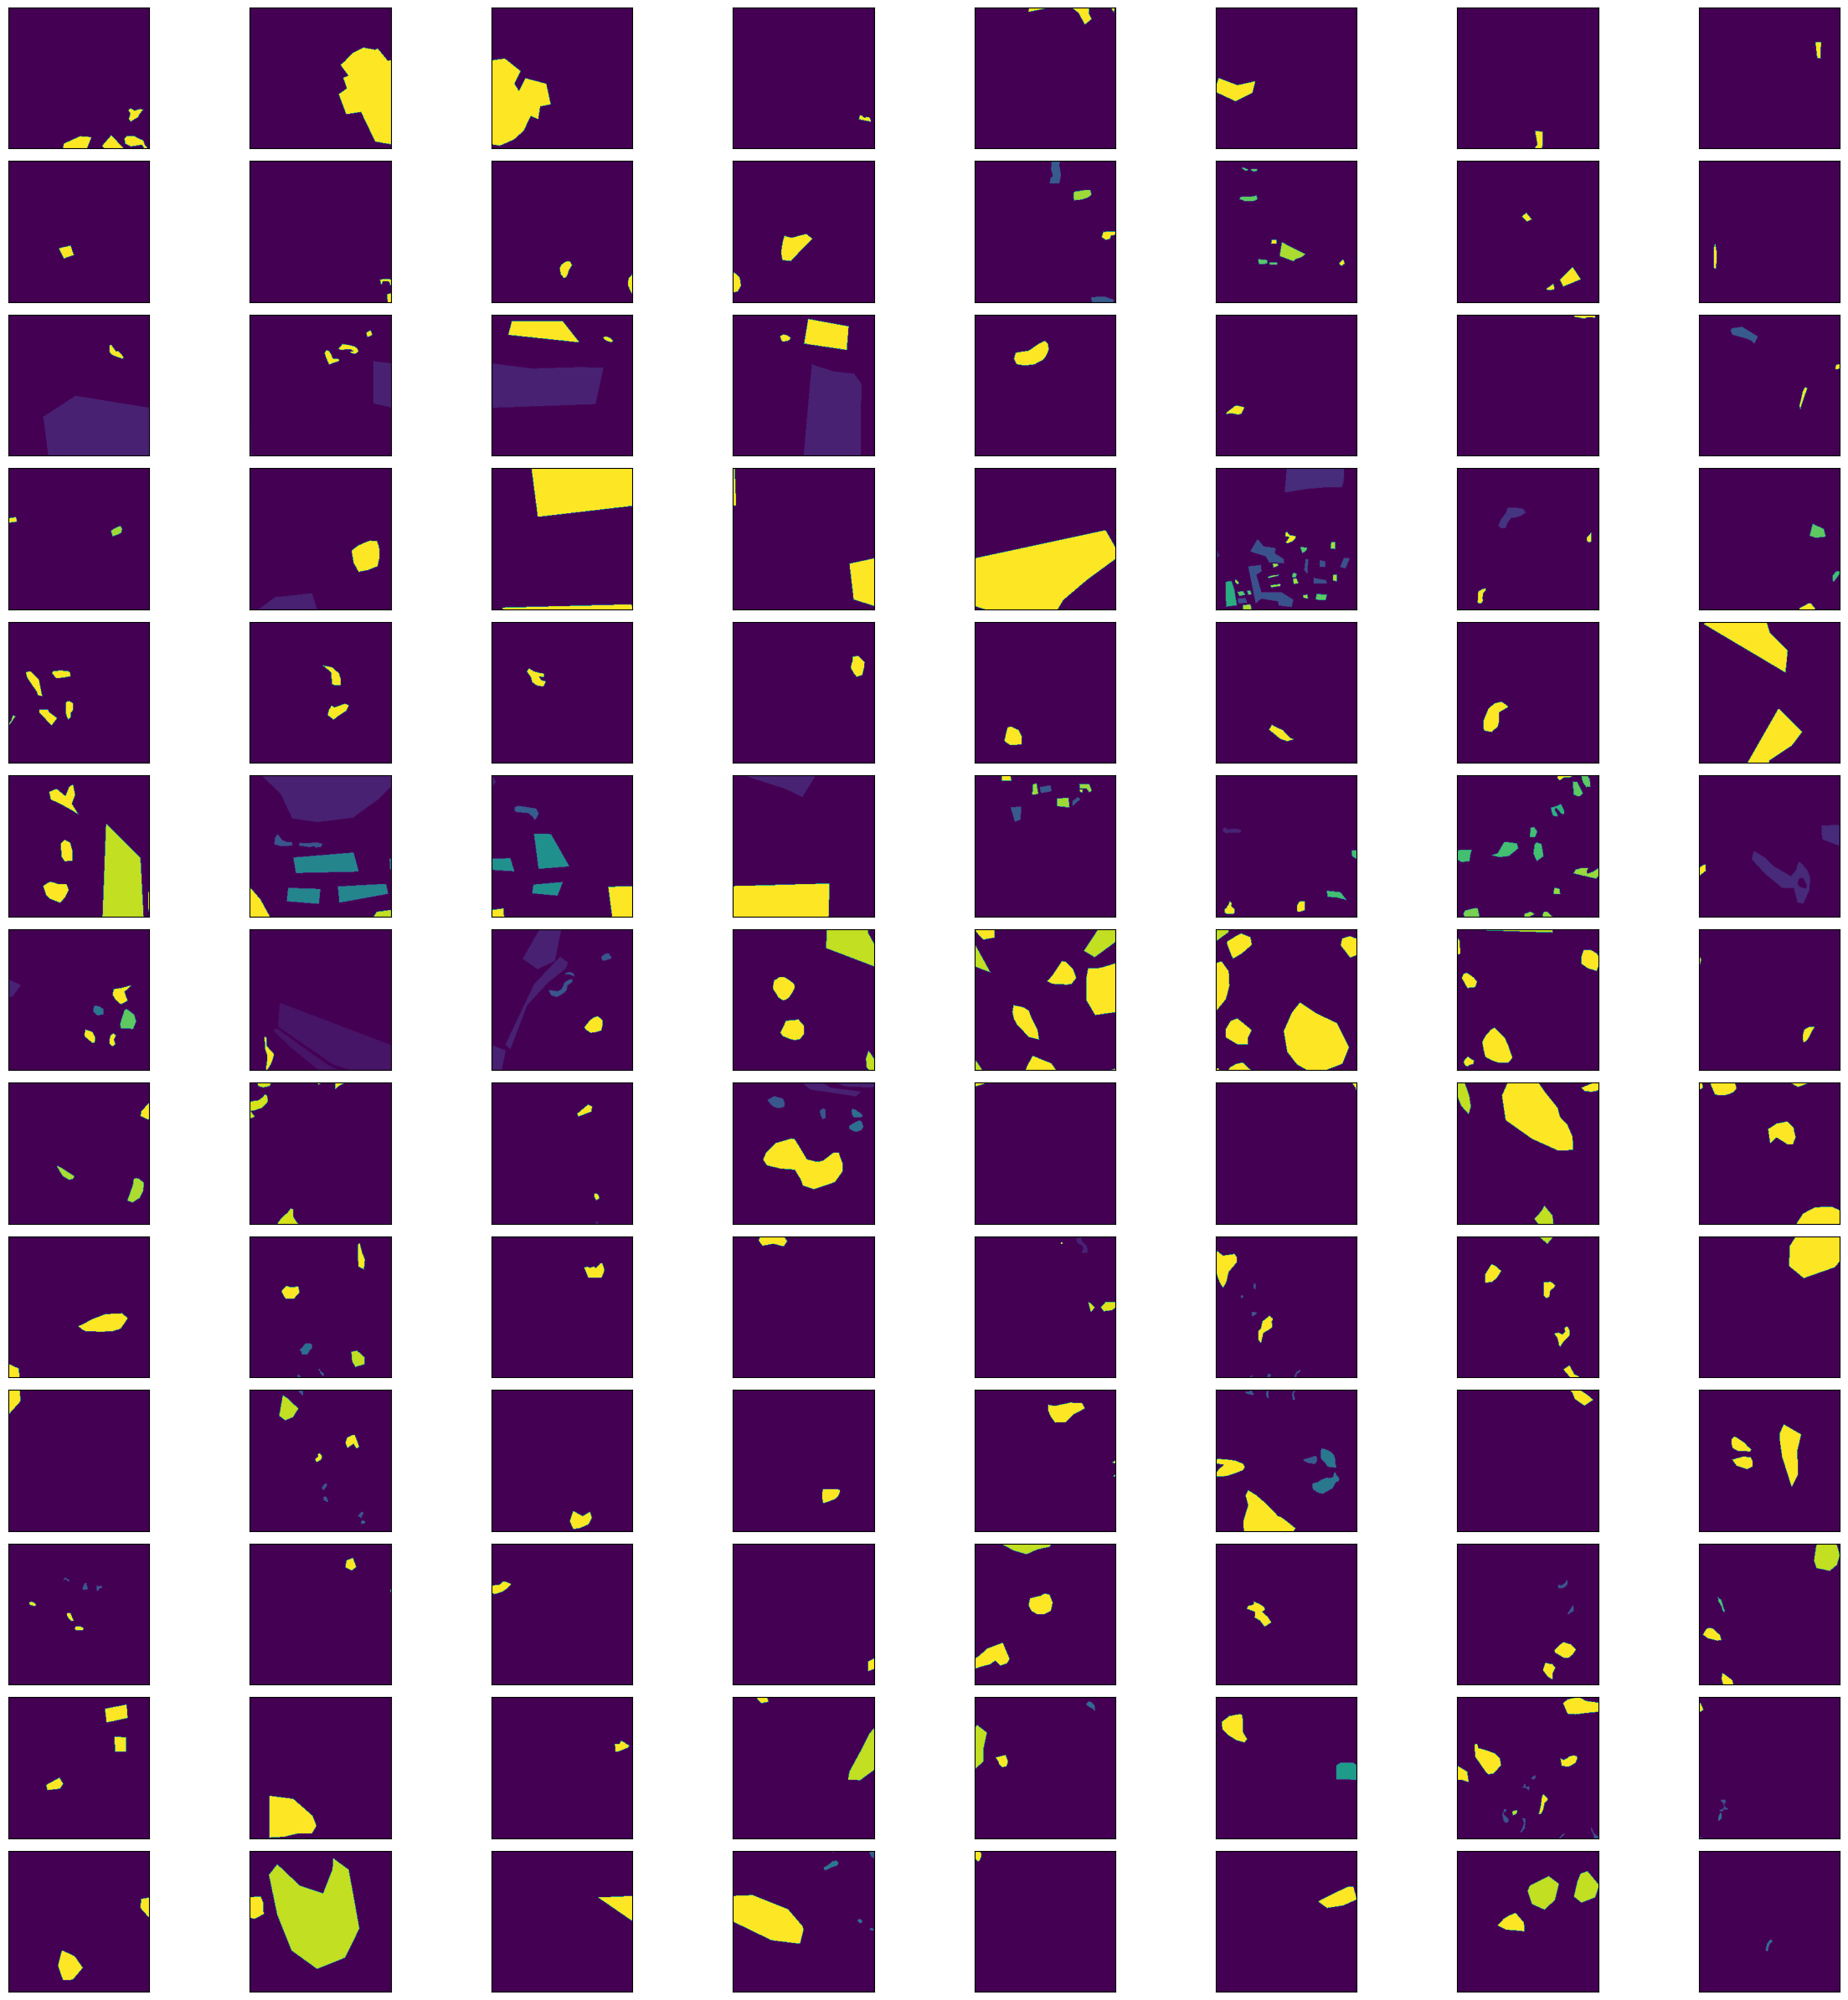

In [64]:
# Reshape the tensor to (104, 256, 256)
images = new_sampled_tensor.reshape(104, 256, 256)


# Create a figure with 13 rows and 8 columns
fig, axes = plt.subplots(13, 8, figsize=(24, 24))

# Plot each image as a subplot
count = 0
for i in range(13):
    for j in range(8):
        if count < 104:
            axes[i, j].imshow(images[count], cmap='viridis')
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            count += 1
        else:
            axes[i, j].axis('off')

# Tighten the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()

In [67]:
new_sampled_tensor[98]

<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>


1. apply the filter to weed out the unwanted patches
2. create one-hot encoding on the label patches
3. split the patches into train-test-validation
4. write a function to do all the pre-processing steps on tf.record input

Task 1: apply the filter to weed out the unwanted patches

In [ ]:
# we now have a filter which of the shape of the patches tensor
# tiles_tensor

In [1]:
import tensorflow as tf

In [26]:
tensor_1 = tf.ones((3,2, 5,5 , 1), dtype=tf.float32)

In [34]:
mask = np.array([[False, False],[True, False],[False, False]])

In [33]:
tf.boolean_mask(tensor_1, mask)

<tf.Tensor: shape=(0, 5, 5, 1), dtype=float32, numpy=array([], shape=(0, 5, 5, 1), dtype=float32)>

In [21]:
tensor_2 = tf.zeros((2,2, 2,2 , 1), dtype=tf.float32)
print(tensor_2)

tf.Tensor(
[[[[[0.]
    [0.]]

   [[0.]
    [0.]]]


  [[[0.]
    [0.]]

   [[0.]
    [0.]]]]



 [[[[0.]
    [0.]]

   [[0.]
    [0.]]]


  [[[0.]
    [0.]]

   [[0.]
    [0.]]]]], shape=(2, 2, 2, 2, 1), dtype=float32)


In [25]:
import numpy as np
mask = np.array([True, False, True])
tf.boolean_mask(tensor_2, mask)

ValueError: ignored

In [8]:
tensor_1[2][1]

TypeError: ignored

In [10]:
tf.random.set_seed(42)

# Define the shape of the boolean mask
mask_shape = (3, 2)

# Create a boolean mask with random True/False values
sampled_mask = tf.random.uniform(shape=mask_shape, minval=0, maxval=2, dtype=tf.int32) == 1

# Print the boolean mask
print(sampled_mask)

tf.Tensor(
[[ True  True]
 [ True False]
 [False False]], shape=(3, 2), dtype=bool)


In [11]:
masked_tensor = tf.boolean_mask(tensor_1, sampled_mask, axis=(0, 1))

TypeError: ignored

In [ ]:
import tensorflow as tf

tensor_1 = tf.zeros((3,2, 5,5 , 1), dtype=tf.float32)
sampled_tensor =

# Apply boolean mask to tensor_1
masked_tensor = tf.boolean_mask(tensor_1, sampled_tensor)

# Print the resulting tensor
print(masked_tensor)

In [69]:
# Assuming your pixel values are float labels
float_labels = tf.squeeze(new_sampled_tensor, axis=-1)  # Assuming channel dimension is the last one

# Determine the number of classes dynamically
num_classes = tf.cast(tf.reduce_max(float_labels) + 1, tf.int32)

# One-hot encode each image
one_hot_encoded_images = tf.one_hot(tf.dtypes.cast(float_labels, tf.int32), depth=num_classes)

# Print the shape of the resulting tensor and the number of classes
print("Shape of one-hot encoded images:", one_hot_encoded_images.shape)
print("Number of classes:", num_classes)

Shape of one-hot encoded images: (104, 256, 256, 23)
Number of classes: tf.Tensor(23, shape=(), dtype=int32)


In [72]:
flat_tensor = tf.reshape(float_labels, (104, -1))

# Find unique values in the flattened tensor
unique_values, _ = tf.unique(tf.reshape(flat_tensor, [-1]))

# Print the unique values
print("Unique values:", unique_values)

Unique values: tf.Tensor(
[ 0. 22.  7.  2.  8.  9.  6. 11.  1.  5. 13. 15. 14. 20. 10.  3. 17. 16.
 18.  4. 21.], shape=(21,), dtype=float32)


In [73]:
_

<tf.Tensor: shape=(6815744,), dtype=int32, numpy=array([0, 0, 0, ..., 0, 0, 0], dtype=int32)>

In [ ]:
#there are 21 values - 12 and 19 are missing
# for each value corresponding to

1. perform one hot encoding on one image containing 21 values


In [92]:
import tensorflow as tf
import numpy as np

# Generate random integers between 0 and 22 excluding 12 and 19
tensor_values = np.random.choice([i for i in range(23) if i not in [12, 19]], size=(256, 256))

# Create a TensorFlow tensor
tensor = tf.constant(tensor_values, dtype=tf.int32)

# Number of classes (excluding 12 and 19)
num_classes = 23

# Perform one-hot encoding
one_hot_encoded_tensor = tf.one_hot(tensor, num_classes)

# Convert one-hot encoded tensor back to the original array
restored_tensor = tf.argmax(one_hot_encoded_tensor, axis=-1)

# Cast the restored tensor back to tf.int32
restored_tensor = tf.cast(restored_tensor, dtype=tf.int32)

# Print the original tensor and the restored tensor
print("Original Tensor:")
print(tensor)

print("\nOne-Hot Encoded Tensor:")
print(one_hot_encoded_tensor)

print("\nRestored Tensor:")
print(restored_tensor)

# Check if the original and restored tensors are the same
are_equal = tf.reduce_all(tf.equal(tensor, restored_tensor))
print("\nAre the original and restored tensors the same? {}".format(are_equal.numpy()))


Original Tensor:
tf.Tensor(
[[16  4  8 ...  5 15 11]
 [ 2 10 13 ... 16 11  2]
 [ 7  0  2 ...  3  5 10]
 ...
 [10  1 10 ... 17  7  9]
 [14  4 15 ...  0 13  9]
 [15  3  9 ...  5 16 18]], shape=(256, 256), dtype=int32)

One-Hot Encoded Tensor:
tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  

In [93]:
restored_tensor

<tf.Tensor: shape=(256, 256), dtype=int32, numpy=
array([[16,  4,  8, ...,  5, 15, 11],
       [ 2, 10, 13, ..., 16, 11,  2],
       [ 7,  0,  2, ...,  3,  5, 10],
       ...,
       [10,  1, 10, ..., 17,  7,  9],
       [14,  4, 15, ...,  0, 13,  9],
       [15,  3,  9, ...,  5, 16, 18]], dtype=int32)>

In [94]:
tensor

<tf.Tensor: shape=(256, 256), dtype=int32, numpy=
array([[16,  4,  8, ...,  5, 15, 11],
       [ 2, 10, 13, ..., 16, 11,  2],
       [ 7,  0,  2, ...,  3,  5, 10],
       ...,
       [10,  1, 10, ..., 17,  7,  9],
       [14,  4, 15, ...,  0, 13,  9],
       [15,  3,  9, ...,  5, 16, 18]], dtype=int32)>

In [90]:
tensor[-2][-1]

<tf.Tensor: shape=(), dtype=int32, numpy=22>

In [95]:
one_hot_encoded_tensor[-2][-1]

<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>

In [89]:
tf.argmax(one_hot_encoded_tensor[-1][-1])

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
# number of classes = 23

In [96]:
# Assuming your pixel values are float labels
float_labels = tf.squeeze(new_sampled_tensor, axis=-1)  # Assuming channel dimension is the last one

# Determine the number of classes dynamically
num_classes = tf.cast(tf.reduce_max(float_labels) + 1, tf.int32)

# One-hot encode each image
one_hot_encoded_images = tf.one_hot(tf.dtypes.cast(float_labels, tf.int32), depth=num_classes)

# Print the shape of the resulting tensor and the number of classes
print("Shape of one-hot encoded images:", one_hot_encoded_images.shape)
print("Number of classes:", num_classes)

Shape of one-hot encoded images: (104, 256, 256, 23)
Number of classes: tf.Tensor(23, shape=(), dtype=int32)


Let's organize until here:

0. get the data from tf.record and save it as a tf.data
1. Extracting the image and label
2. applying pre-processing functions on image - normalization
3. applying pre-processing functions on image and label - creating patches
4. visualization function
5. sampling function
6. visualization function for sampled output
7. apply sampling mask
8. one-hot encoding for label
9. shuffling and splitting the tensors


In [98]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
import tensorflow as tf

In [100]:
#0. getting data from tf.record and storing in dataset

feature_description = {
    "image": tf.io.VarLenFeature(tf.float32),
    "image_shape": tf.io.VarLenFeature(tf.int64),
    "label": tf.io.VarLenFeature(tf.float32),
    "label_shape": tf.io.VarLenFeature(tf.int64),
}

def parse(serialized_examples):
    return tf.io.parse_example(serialized_examples, feature_description)

dataset = tf.data.TFRecordDataset(["/content/gdrive/MyDrive/exp/output.tfrecord"]).map(parse)
# for parsed_examples in dataset:
#     print(parsed_examples)

In [101]:
#1 extracting one image and label from the dataset

for parsed_example in dataset.take(1):
    image_shape = tf.sparse.to_dense(parsed_example["image_shape"])
    image = tf.reshape(tf.sparse.to_dense(parsed_example["image"]), image_shape)
    label_shape = tf.sparse.to_dense(parsed_example["label_shape"])
    label = tf.reshape(tf.sparse.to_dense(parsed_example["label"]), label_shape)

In [102]:
#2 applying normalization on image

def bandwise_normalize(input_tensor, epsilon=1e-8):
    # Calculate the minimum and maximum values along the channel axis
    min_val = tf.math.reduce_min(input_tensor, axis=2, keepdims=True)
    max_val = tf.math.reduce_max(input_tensor, axis=2, keepdims=True)

    # Check for potential numerical instability
    denom = max_val - min_val
    denom = tf.where(tf.abs(denom) < epsilon, epsilon, denom)

    # Normalize the tensor band-wise to the range [0, 1]
    normalized_tensor = (input_tensor - min_val) / denom

    return normalized_tensor

image = bandwise_normalize(image)


In [104]:

def pad_to_multiple(image, TILE_HT, TILE_WD):
    # Get the current dimensions
    height, width, channels = image.shape

    # Calculate the target dimensions
    target_height = tf.cast(tf.math.ceil(height / TILE_HT) * TILE_HT, tf.int32)
    target_width = tf.cast(tf.math.ceil(width / TILE_WD) * TILE_WD, tf.int32)

    # Calculate the amount of padding
    pad_height = target_height - height
    pad_width = target_width - width

    # Pad the image
    padded_image = tf.image.resize_with_crop_or_pad(image, target_height, target_width)

    return padded_image

In [130]:
#3. creating patches


def tile_image(fullimg, CHANNELS=1, TILE_HT=128, TILE_WD=128):
    fullimg = pad_to_multiple(fullimg, TILE_HT, TILE_WD)
    images = tf.expand_dims(fullimg, axis=0)
    tiles = tf.image.extract_patches(
        images=images,
        sizes=[1, TILE_HT, TILE_WD, 1],
        strides=[1, TILE_HT, TILE_WD, 1],
        rates=[1, 1, 1, 1],
        padding='VALID')
    print(tiles.shape)

    tiles = tf.squeeze(tiles, axis=0)
    nrows = tiles.shape[0]
    ncols = tiles.shape[1]
    print(tiles.shape)
    tiles = tf.reshape(tiles, [nrows, ncols, TILE_HT, TILE_WD, CHANNELS])
    print(tiles.shape)
    return tiles

image_patches = tile_image(image,8)
label_patches = tile_image(label)

(1, 29, 36, 131072)
(29, 36, 131072)
(29, 36, 128, 128, 8)
(1, 29, 36, 16384)
(29, 36, 16384)
(29, 36, 128, 128, 1)


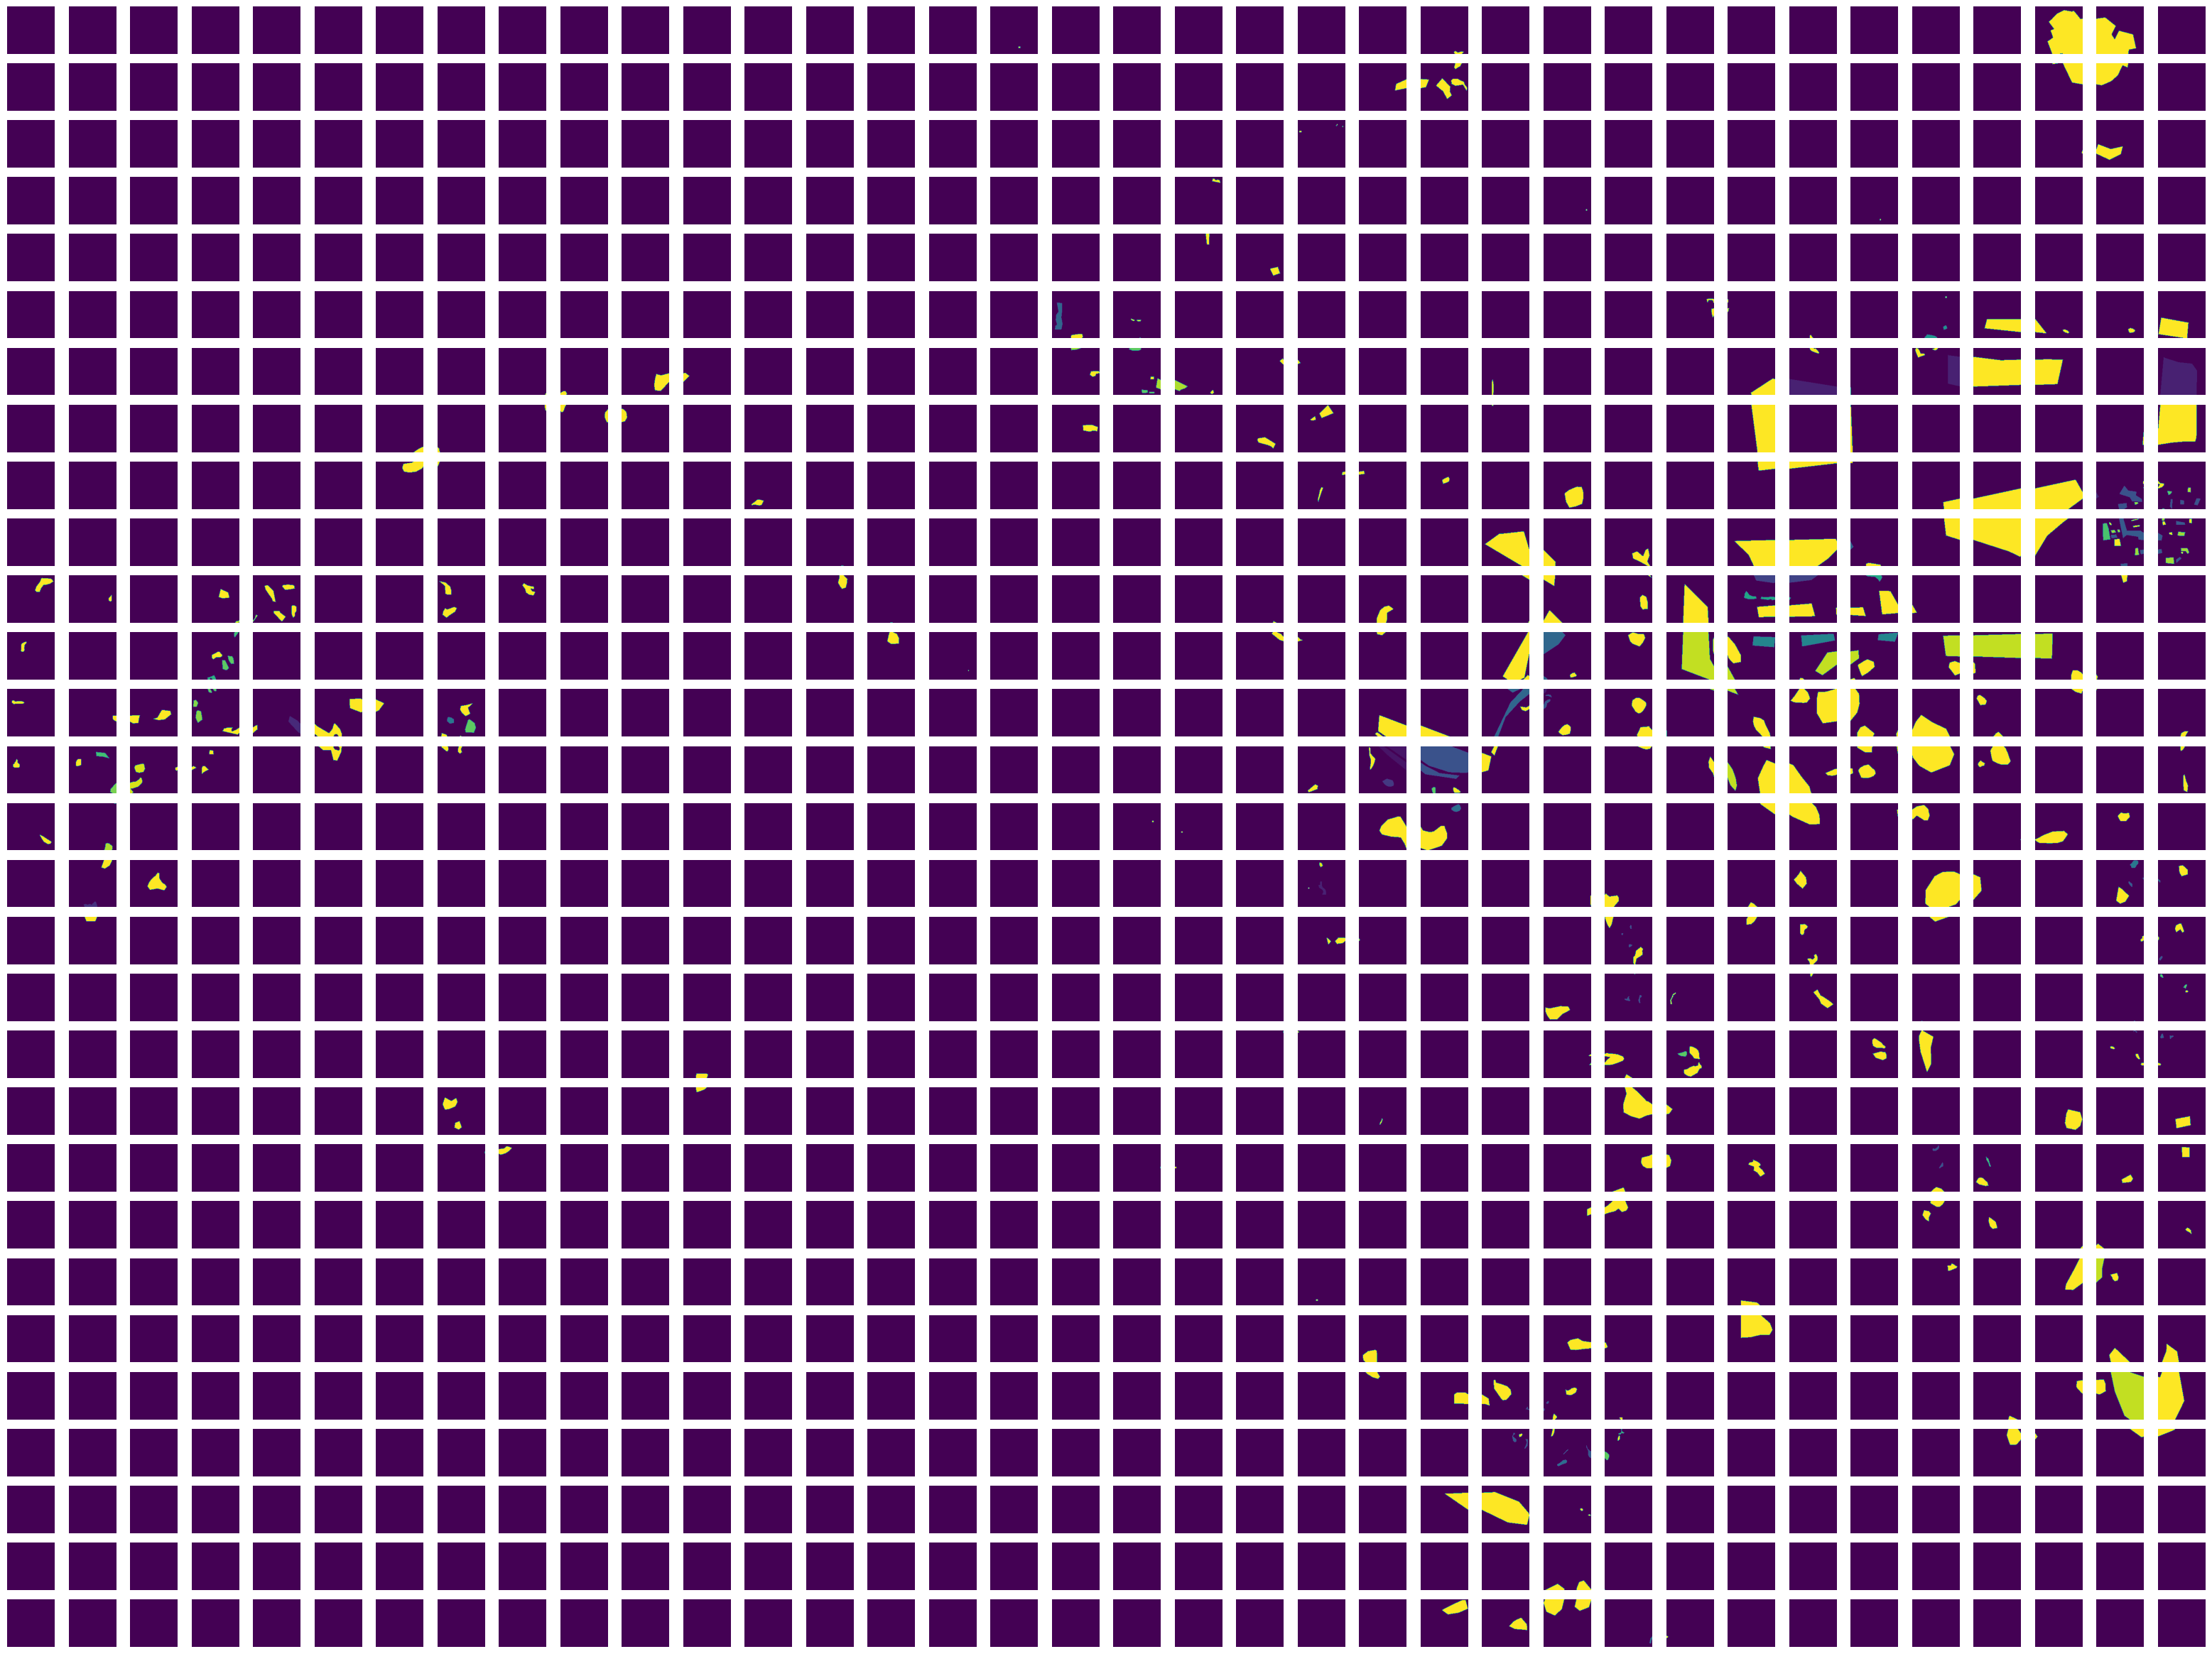

In [113]:
#4. visualizing patches

def visualize_patches(img):

    nrows = img.shape[0]
    ncols = img.shape[1]
    f, ax = plt.subplots(nrows, ncols, figsize=(40,30))
    for rowno in range(nrows):
        for colno in range(ncols):
            new_img = img[rowno][colno]
            ax[rowno, colno].imshow(img[rowno][colno].numpy() );
            ax[rowno, colno].axis('off')

#visualize_patches(image_patches[..., -1]) #only works for one dimension, as the image is 8-band only visualize the last band
visualize_patches(label_patches)

In [131]:
#5. sampling function

def sampling(label_image, threshold_percentage = 99.9):

    num_zeros = tf.reduce_sum(tf.cast(tf.equal(label_image, 0), tf.float32), axis=[2, 3, 4])

    # Calculate the total number of elements in each patch
    total_elements = tf.cast(tf.reduce_prod(tf.shape(my_tensor)[2:]), tf.float32)

    # Calculate the percentage of zeros in each patch
    percentage_zeros = (num_zeros / total_elements) * 100.0

    boolean_mask = percentage_zeros <= threshold_percentage
    # Apply the threshold logic
    sampled_tensor = tf.cast(percentage_zeros >= threshold_percentage, tf.int32)

    return boolean_mask, sampled_tensor

#6. visualize the sampling function on all patches

def visualize_sampling(image,sampled_tensor):

    nrows = image.shape[0]
    ncols = image.shape[1]
    f, ax = plt.subplots(nrows, ncols, figsize=(50,30))
    for rowno in range(nrows):
        for colno in range(ncols):
            img = image[rowno][colno]
            ax[rowno, colno].imshow( image[rowno][colno].numpy() );
            ax[rowno, colno].axis('off')
            if sampled_tensor[rowno][colno] > 0:
                ax[rowno, colno].set_title('useless', fontsize=15)


sampled_mask, sampled_tensor = sampling(label_patches)
#visualize_sampling(label_patches,sampled_tensor)

In [132]:
#7. apply sampling mask on label_patches and image_patches
sampled_image_patches = tf.boolean_mask(image_patches, sampled_mask)
sampled_image_patches.shape

TensorShape([1044, 128, 128, 8])

In [133]:
sampled_label_patches = tf.boolean_mask(label_patches, sampled_mask)

In [134]:
sampled_label_patches.shape

TensorShape([1044, 128, 128, 1])

In [135]:
#8. one-hot encoding for the label

def one_hot_encoding(label_tensor):
    # Assuming your pixel values are float labels
    float_labels = tf.squeeze(label_tensor, axis=-1)  # Assuming channel dimension is the last one

    # Determine the number of classes dynamically
    num_classes = tf.cast(tf.reduce_max(float_labels) + 1, tf.int32)

    # One-hot encode each image
    one_hot_encoded_images = tf.one_hot(tf.dtypes.cast(float_labels, tf.int32), depth=num_classes)

    # Print the shape of the resulting tensor and the number of classes
    #print("Shape of one-hot encoded images:", one_hot_encoded_images.shape)
    #print("Number of classes:", num_classes)

    return one_hot_encoded_images

sampled_label_patches = one_hot_encoding(sampled_label_patches)

In [136]:
sampled_label_patches.shape


TensorShape([1044, 128, 128, 23])

In [137]:
sampled_image_patches.shape

TensorShape([1044, 128, 128, 8])

In [138]:
# Combine input_image and input_label into a single dataset
dataset = tf.data.Dataset.from_tensor_slices((sampled_image_patches, sampled_label_patches))

# Shuffle the dataset
buffer_size = 500  # Adjust the buffer size based on your dataset size
dataset = dataset.shuffle(buffer_size)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(sampled_image_patches))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)